# Problem 1.8

In [1]:
import numpy as np
from numpy.typing import ArrayLike
from scipy.constants import speed_of_light

def effective_index_from_sellmeier_coefficients(
    wl,
    *,
    A1 = 0.696749,
    A2 = 0.408218,
    A3 = 0.890815,
    wl1 = 0.0690660,
    wl2 = 0.115662,
    wl3 = 9.900559,
):
    """
    wl, wl1, wl2, wl3 in micrometers
    """
    return np.sqrt(1 + A1 * wl**2 / (wl**2 - wl1**2) + A2 * wl**2 / (wl**2 - wl2**2)+ A3 * wl**2 / (wl**2 - wl3**2))

def calculate_group_index(
    wl: ArrayLike,
    n: ArrayLike,
):
    return n - wl*np.gradient(n, wl)

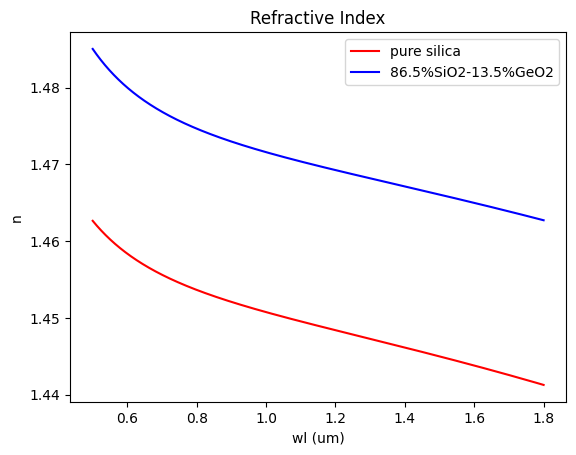

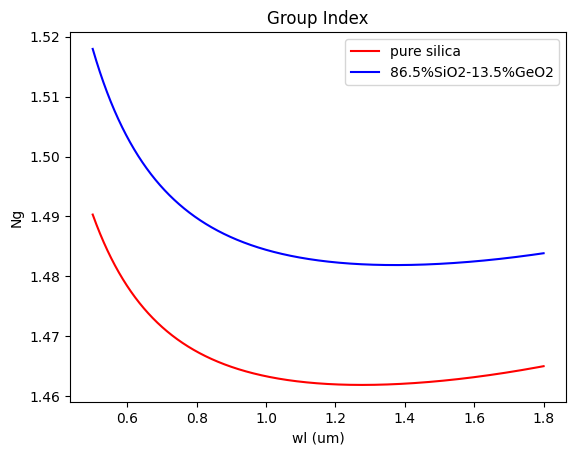

In [2]:
import matplotlib.pyplot as plt
wl_min = 0.5
wl_max = 1.8

wl_um = np.linspace(wl_min, wl_max, 10000)

# Effective index of pure silica
sellmeier_coefficients_silica = {
    "A1": 0.696749,
    "A2": 0.408218,
    "A3": 0.890815,
    "wl1": 0.0690660,
    "wl2": 0.115662,
    "wl3": 9.900559,
}

sellmeier_coefficients_modified_silica = {
    "A1": 0.711040,
    "A2": 0.451885,
    "A3": 0.704048,
    "wl1": 0.0642700,
    "wl2": 0.129408,
    "wl3": 9.425478,
}


n_silica = effective_index_from_sellmeier_coefficients(wl_um, **sellmeier_coefficients_silica)
n_modified_silica = effective_index_from_sellmeier_coefficients(wl_um, **sellmeier_coefficients_modified_silica)
plt.plot(wl_um, n_silica, color='r', label="pure silica")
plt.plot(wl_um, n_modified_silica, color='b', label="86.5%SiO2-13.5%GeO2")
plt.title("Refractive Index")
plt.xlabel("wl (um)")
plt.ylabel("n")
plt.legend()
plt.show()


# Plot group index for both materials
group_index_silica = calculate_group_index(wl_um, n_silica)
group_index_modified_silica = calculate_group_index(wl_um, n_modified_silica)
plt.plot(wl_um, group_index_silica, color='r', label="pure silica")
plt.plot(wl_um, group_index_modified_silica, color='b', label="86.5%SiO2-13.5%GeO2")
plt.title("Group Index")
plt.xlabel("wl (um)")
plt.ylabel("Ng")
plt.legend()
plt.show()
# Wavelength at which group velocity is 0 for both materials


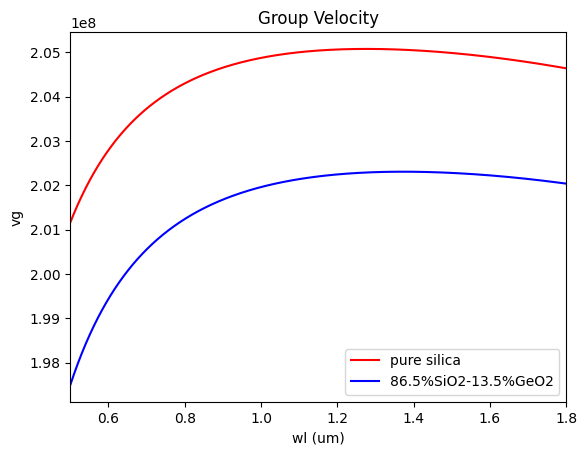

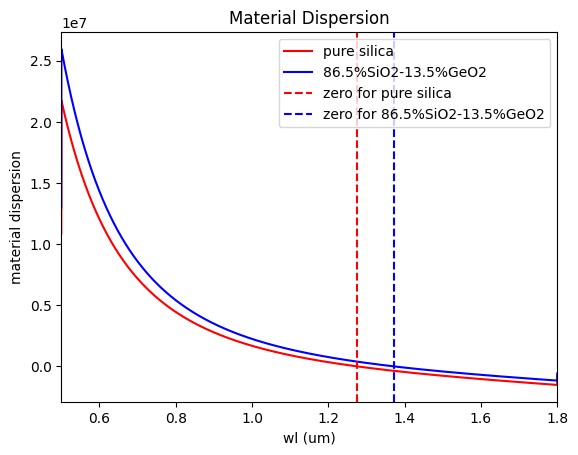

0 Group Velocity Silica at: 1.2757875787578756
0 Group Velocity 86.5%SiO2-13.5%GeO2 at: 1.3722572257225722


In [3]:
vg_silica = speed_of_light / group_index_silica
vg_modified_silica = speed_of_light / group_index_modified_silica

material_dispersion_silica = np.gradient(vg_silica, wl_um)
material_dispersion_modified_silica = np.gradient(vg_modified_silica, wl_um)

plt.plot(wl_um, vg_silica, color='r', label="pure silica")
plt.plot(wl_um, vg_modified_silica, color='b', label="86.5%SiO2-13.5%GeO2")
plt.xlim([wl_min, wl_max])
plt.xlabel("wl (um)")
plt.ylabel("vg")
plt.title("Group Velocity")
plt.legend()
plt.show()

zero_idx_silica = np.argmin(np.abs(material_dispersion_silica))
zero_idx_modified_silica = np.argmin(np.abs(material_dispersion_modified_silica))

plt.plot(wl_um, material_dispersion_silica, color="r", label="pure silica")
plt.plot(wl_um, material_dispersion_modified_silica, color="b", label="86.5%SiO2-13.5%GeO2")

plt.axvline(wl_um[zero_idx_silica], linestyle="--", color="r", label="zero for pure silica")
plt.axvline(wl_um[zero_idx_modified_silica], linestyle="--", color="b", label="zero for 86.5%SiO2-13.5%GeO2")

plt.xlim([wl_min, wl_max])
plt.xlabel("wl (um)")
plt.ylabel("material dispersion")
plt.title("Material Dispersion")
plt.legend()
plt.show()

print(f"0 Group Velocity Silica at: {wl_um[zero_idx_silica]}")
print(f"0 Group Velocity 86.5%SiO2-13.5%GeO2 at: {wl_um[zero_idx_modified_silica]}")